# The Use of Matrices in Computer Graphics
### By Shahzeb Khan
For Professor Philley's Linear Algebra class.

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

Let's initialize a square box shape called `box`. Here we are just defining the coordinates needed to make the box. Important to note that computers draw their grid system slightly different than we are use to. The origin `(0,0)` is located at the top left. The y-axis increases downwards. The x-axis is unchanged. Another change in computer graphics is that coordinates are written `(y,x)`/`(n,m)` instead of `(x,y)`/`(m,n)`. Both of these changes are a result of CPU's and monitors drawing graphics from the top left downward.

In [152]:
# Define the coordinates that make up our box shape in the format of (y,x)
box = np.array([[5,5],
               [6,5],
               [5,6],
               [6,6]])

Let's go ahead and define a function called `drawShape` which can draw any coordinates onto a grid. Let's also define a function called `getImageMatrix` which takes any shape matrix and returns a `(10,10)` matrix where everything is 0 except the pixels which create the shape is set to 1.

In [153]:
def drawShape(coordinates):
    """Draws an image and returns a matrix of that image"""
    figure(1)
    imshow(coordinates, interpolation='nearest')
    grid(False)
    
def getImageMatrix(shape, size=10):
    """Return a (10,10) matrix which contains 1's for the shape"""
    matrix = np.zeros((size, size),dtype=np.int16)
    for i in shape:
        matrix[i[0]][i[1]] = 1
    return matrix

Now we can run the `boxShape` function to draw the image while passing in our earlier defined box as the shape we would like to draw:

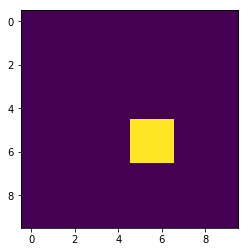

In [154]:
boxMatrix = getImageMatrix(box)
drawShape(boxMatrix)

Now that we have drawn the image using the `drawShape` function, we have also set the variable `boxMatrix` to be the matrix representation of this image. Let's take a look:

In [131]:
print(boxMatrix)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Let's try multiplying this `boxMatrix` with the identity matrix of `[1,0],[0,1]`. We will draw out the result of the matrix multiplication:

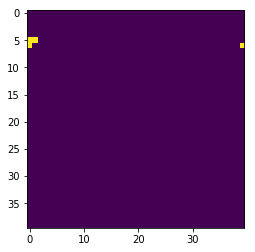

In [157]:
identity = np.array([[1,-1], # Where the identity matrix is defined
                     [0,1]]) 
identity = np.matmul(box, identity)
boxMatrix2 = getImageMatrix(identity, 40)
drawShape(boxMatrix2)

Exactly as we expected, we got back the same box at the same location